# **Titanic Dataset prediction by survival rate**
### 👨‍💻Author: Muhammad Irfan

# **Dataset Description**
##  **Overview**

**The data has been split into two groups:**

**`training set (train.csv)`**

**`test set (test.csv)`**

The training set should be used to build your `machine learning models.` For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **`gender_submission.csv`**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## **Data Dictionary**
Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number
	
fare	Passenger fare

cabin	Cabin number	

embarked	   Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## **Variable Notes**

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## **`Survival Rate predicted by Neural Network in Tensorflow`**


# Import Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

## Load The Dataset 

In [2]:

# Provide the correct file path to your CSV file
file_path = "/Users/muhammadtayyab/Irfan Data/Project`s/Titanic_Disaster_Project/train.csv"
file_path1 = "/Users/muhammadtayyab/Irfan Data/Project`s/Titanic_Disaster_Project/test.csv"
file_path2 = "/Users/muhammadtayyab/Irfan Data/Project`s/Titanic_Disaster_Project/gender_submission.csv"

# Read the CSV file into a pandas DataFrame
df_train = pd.read_csv(file_path)
df_test = pd.read_csv(file_path1)
df_submission = pd.read_csv(file_path2)


# Display the first few rows of the DataFrame to ensure it was read correctly
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Let's do some  exploratory Analysis on df_train Data**

In [3]:
# Get Information All about Data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Calculate the percentage of missing values in each column
missing_percentage = round(df_train.isnull().sum() / len(df_train) * 100, 3)

# Sort the values in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display The Missing_Percentage
missing_percentage

Cabin          77.104
Age            19.865
Embarked        0.224
PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
SibSp           0.000
Parch           0.000
Ticket          0.000
Fare            0.000
dtype: float64

# Obeservation :
- In the Train Dataset `8` Numeric Columns and `5` Categorical Columns .
- In the Above Information , In `Age`,`Cabin` and `Embarked` Columns where `Missing Values` Respectivily.   
- In the **`Cabin`** Columns , The Percentage of Missing Values is `77` So Im Remove this Column , But it's My Observation . Remaining Columns am Impute using **Knn imputer.** 

## Handle The Missing Values and Encode The Data 

In [5]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.impute import KNNImputer, SimpleImputer

# Initialize KNNImputer
knn_imputer = KNNImputer()

# Fit and transform the DataFrame to impute missing values for 'Age'
df_train['Age'] = knn_imputer.fit_transform(df_train[['Age']])

# Initialize SimpleImputer with strategy='most_frequent'
simple_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the DataFrame to impute missing values for 'Embarked'
df_train['Embarked'] = simple_imputer.fit_transform(df_train[['Embarked']])[:, 0]


In [7]:
# Drop the 'Cabin' column from the DataFrame
df_train.drop('Cabin', axis=1, inplace=True)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# **Lets Move To Build Neural Network** 

### **Task 1: Splitting the Data into Features (X) and Target (y)**

In [10]:
# Split the data into X and y
X_train = df_train.drop(['Survived', 'Name'], axis=1)
y_train = df_train['Survived']

### **Task 2: Encoding Categorical Features in Features (X)**

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object' or X_train[col].dtype == 'category':
        X_train[col] = label_encoder.fit_transform(X_train[col])

### **Task 3: Encoding the Target Variable (y)**

In [12]:
# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit and transform your target variable using LabelEncoder
y_train = le.fit_transform(y_train)

In [13]:
# Split the Data into Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

### **Task 4: Building the Neural Network Model**

In [14]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    # tf.keras.layers.Dense(64, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 2
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 3
    tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 4
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
])

2024-02-29 03:55:48.653475: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### **Task 5: Compiling the Model**

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Task 6: Train the Model**


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=5)

history = model.fit(X_train, y_train, epochs=50, 
                    batch_size=32, verbose=1, 
                    validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
16/16 [==============================] - 2s 20ms/step - loss: 6.1788 - accuracy: 0.5281 - val_loss: 2.2038 - val_accuracy: 0.7040
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 1.4526 - accuracy: 0.5622 - val_loss: 0.9143 - val_accuracy: 0.5920
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7767 - accuracy: 0.6747 - val_loss: 0.8340 - val_accuracy: 0.5680
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.6205 - val_loss: 0.6653 - val_accuracy: 0.7120
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.6586 - val_loss: 0.6242 - val_accuracy: 0.6960
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6352 - accuracy: 0.6787 - val_loss: 0.6079 - val_accuracy: 0.6960
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.6807 - val_loss: 0.6066 - val_accuracy: 0.7040
Epoch 8/50
16/16 [=

### **Task 7: Evaluate the Model on Training Data**

In [17]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

20/20 [==============================] - 0s 1ms/step - loss: 0.6334 - accuracy: 0.6902
Training Accuracy: 0.6902
Training Loss: 0.6334


### **Task 8: Evaluate the Model on Testing Data**

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {:.4f}".format(accuracy))
print("Testing Loss: {:.4f}".format(loss))


Testing Accuracy: 0.6418
Testing Loss: 0.7287


### **Task 9: Plot Training and Validation Loss**

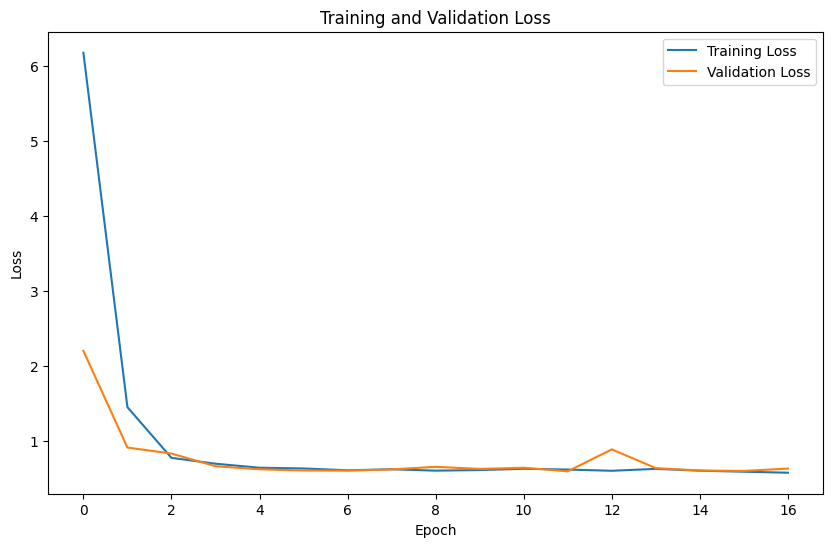

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


9/9 [==============================] - 0s 1ms/step


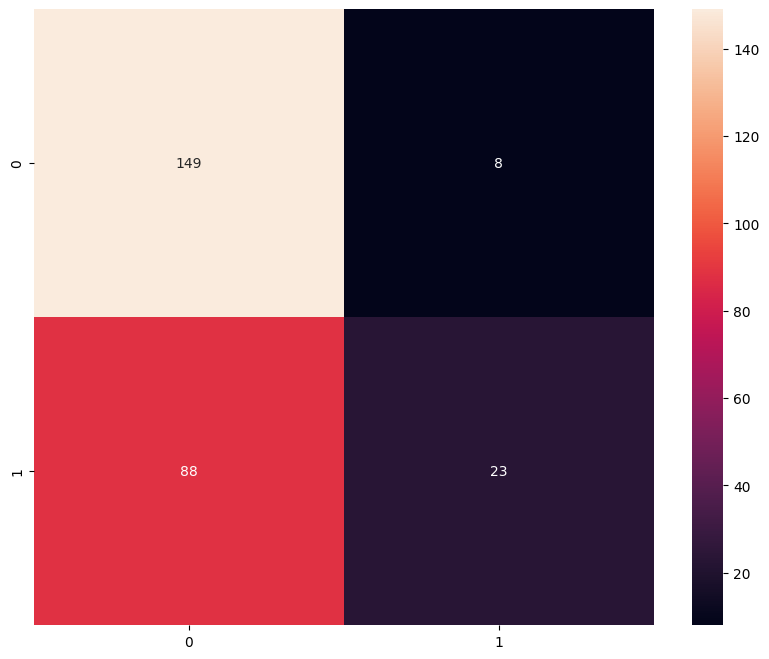

In [20]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.show()